# Introduction to the Temporal Barcode Dataset

Using temporal coding of broadband stimuli as a classification barcode
Motivation: Classification of sensory neurons is a long-standing central problem important for
understanding how brains support perception and extract sensory information to guide behavior.
Neurons can be classified by many criteria: anatomically according to the location in brain,
cellular morphology, and synaptic connectivity (notably using large-scale EM); according to their
gene expression patterns (notably using single-cell RNA-seq); according to their biophysical
membrane properties or synaptic release properties (notably using whole cell recordings and
pharmacology in slice); according to their evolutionary history and developmental origins; or
according to their neurophysiological response profiles in vivo. A major goal of current research
is to clarify the functional importance of cell types, the extent to which different classification
criteria group cells similarly, and the extent to which a cell’s class membership is discrete vs.
continuous or static vs. plastic.
When cortical neurons are injected with white noise current in a slice, the elicited spike
times are highly reproducible (Mainen and Sejnowski, 1995). Neurons also respond to white
noise flicker visual stimuli with high temporal precision, for example in retinal ganglion cells
(Fig1A), LGN (Fig1B), or cortical area MT (Fig1C), to name just a few. Similar results are
reported in other sensory modalities (e.g. Kayser et al, 2010; Jarocka et al, 2021).


![barcoding_fig1.png](../../data/images/barcoding_fig1.png)
###### Figure 1. White noise stimuli evoke temporally precise neural responses. A. Recording of a salamander retinal ganglion cell in a dish in response to repeated white noise full-field flicker (from Berry and Meister 1998). See also: Pillow et al 2005, B. Recording of an anesthetized cat LGN cell in response to repeated white noise fullfield flicker (from Reinagel and Reid, 2000). C. Response of an alert macaque cortical area MT neuron in response to a grating stimulus whose drift direction was modulated with repeated white noise (from Buracas et al, 1998).

Even more astonishingly, the same bar-code-like patterns have been found in neurons recorded
in different individual animals (Fig 2A), and even neurons in different species (Fig 2B). The
temporal pattern of one neuron’s response to the same visual stimulus sequence at different
contrasts are systematically related (Fig 2C), as are reponses of the same neuron to the same
visual stimulus sequence at different luminance (Lewen et al., 2001). These findings have
implications for dynamical models of neural spike coding (Fellous et al, 2004, Wang et al 2019).

![barcoding_fig2.png](../../data/images/barcoding_fig2.png)
###### Figure 2. Temporal barcodes define reproducible and stable types. A. Recording of LGN cells in two different anesthetized cats in response to the same repeated white noise full-field flicker (from Reinagel and Reid, 2002). B. Recordings from a salamander retinal ganglion cell vs. a rabbit retinal ganglion cell in response to the same repeated white noise full-field flicker (from Berry et al, 1997). C. recording of a cat LGN cell to the same repeated white noise full-field flicker shown at different contrasts (from Gaudry and Reinagel, 2007).*

We will use the passive viewing protocol for Neuropixels recordings in WT mice,
targeting as many subcortical and cortical visual areas as possible (5-7 in Config 1, 3-5 in
Config 2). The Binary Full Field Flicker stimulus will be an 8-s long binary white noise full field
flicker, updating every video frame. This stimulus has the advantage of driving all cells with the
identical visual input regardless of receptive field location. The White Noise Drift stimulus will
be a binary white noise sequence specifying at each video frame the direction of motion of a
high contrast full field grating. This stimulus is expected to drive higher visual areas more
strongly and specifically; alignments of neural responses can allow for a global phase shift. Pilot
tests will be needed to determine the best trade-off between the number of repeats we can
record vs. the number of orientations and spatial frequencies to include in the stimulus set.

In [1]:
import warnings
warnings.filterwarnings('ignore')

try:
    from databook_utils.dandi_utils import dandi_download_open
except:
    !git clone https://github.com/AllenInstitute/openscope_databook.git
    %cd openscope_databook
    %pip install -e .

In [2]:
import os
import numpy as np            # various numerical utilities
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image
from math import floor, ceil, isclose

### The Experiment
As shown in the metadata table below, Openscope's Temporal Barcoding Experiment has produced _ main files on the [DANDI Archive](http://dandiarchive.org), with _ males and _ females. There are _ and _ genotypes. This table was generated from [Getting Experimental Metadata from DANDI](../basics/get_dandiset_metadata.ipynb).

In [3]:
# session_files = pd.read_csv("../../data/barcoding_sessions.csv")
# session_files

In [4]:
# m_count = len(session_files["sex"][session_files["sex"] == "M"])
# f_count = len(session_files["sex"][session_files["sex"] == "F"])
# sst_count = len(session_files[session_files["genotype"].str.count("Sst") >= 1])
# pval_count = len(session_files[session_files["genotype"].str.count("Pval") >= 1])
# wt_count = len(session_files[session_files["genotype"].str.count("wt/wt") >= 1])

# print("Dandiset Overview:")
# print(len(session_files), "files")
# print(len(set(session_files["specimen_name"])), "subjects", m_count, "males,", f_count, "females")
# print(sst_count, "sst,", pval_count, "pval,", wt_count, "wt")

### Downloading Ecephys File
Change the values below to download the file you’re interested in. The `dandiset_id` for this project is `000563` . Set `dandi_filepath` to correspond to the dandiset id and filepath of the file you want.

In [5]:
dandiset_id = "000563"
dandi_filepath = "sub-692990/sub-692990_ses-1310924284_ogen.nwb"
download_loc = "."
dandi_api_key = os.environ["DANDI_API_KEY"]

In [6]:
# This can sometimes take a while depending on the size of the file
io = dandi_download_open(dandiset_id, dandi_filepath, download_loc, dandi_api_key=dandi_api_key)
nwb = io.read()

A newer version (0.66.7) of dandi/dandi-cli is available. You are using 0.61.2


File already exists
Opening file


### Showing Probe Tracks
The images below were rendered using the [Visualizing Neuropixels Probe Locations](../visualization/visualize_neuropixels_probes.ipynb) notebook. The probes are using the [Common Coordinate Framework](https://community.brain-map.org/t/allen-mouse-ccf-accessing-and-using-related-data-and-tools/359) (CCF). The experiment uses six probes labeled A-F to target various regions. Note that any warping is do to the spatial adjustment from the subject brain to the rendered model brain.

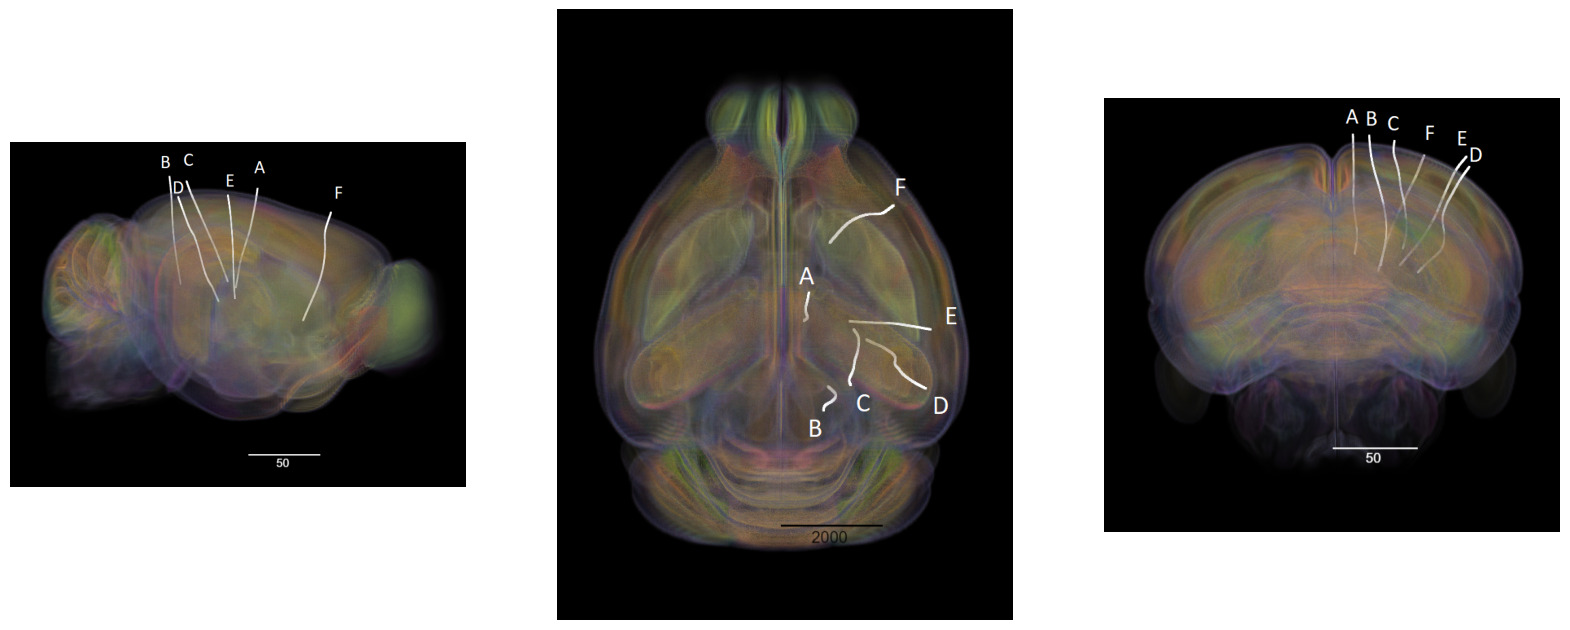

In [7]:
sagittal_view = Image.open("../../data/images/barcoding_probes_sagittal.png")
dorsal_view = Image.open("../../data/images/barcoding_probes_dorsal.png")
transverse_view = Image.open("../../data/images/barcoding_probes_transverse.png")
fig, axes = plt.subplots(1,3,figsize=(20,60))

axes[0].imshow(sagittal_view)
axes[1].imshow(dorsal_view)
axes[2].imshow(transverse_view)
for ax in axes:
    ax.axis("off")

### Loading the Units
Below, the `Units` table is retrieved from the file. It contains many metrics for every putative neuronal unit, printed below. For the analysis in this notebook, we are only interested in the `spike_times` attribute. This is an array of timestamps that a spike is measured for each unit. For more information on the various unit metrics, see [Visualizing Unit Quality Metrics](../visualization/visualize_unit_metrics.ipynb). From this table, the Units used in this notebook are selected if they have 'good' quality rather than 'noise', and if they belong in one of the regions of the primary visual cortex.

In [8]:
# Helper function to find the brain location of each unit
def getUnitsLocation(nwb):
    """
   
    INPUTS:
      nwb      an nwb object
    OUTPUTS:
      unit_locations  List of the assigned brain locations of all units in the units table
    """
    units=nwb.units
    units_peak_channel_id = list(units.peak_channel_id)
    n_units=len(units_peak_channel_id)
    electrodes = nwb.electrodes  
    channelLocations=list(electrodes.location) # anatomic locations of each channel
    channelIDs =list(electrodes.id)  # the id for that channel
    unit_locations=np.zeros((n_units,)).astype(str)
    for i in range(n_units):
        #find the brain region closest to the channel which has the peak value for that unit
        unit_locations[i]=channelLocations[channelIDs.index(units_peak_channel_id[i])] 
    return unit_locations

In [9]:
# Extract the information we need from the data file for our anlaysis

units = nwb.units        # retrieve the `Units` table from the file
# extract spike times from the Units Data table 
units_spike_times = units["spike_times"] # pull out the `spike_times` attribute to be used later
n_units = len(units_spike_times)
print('Number of units: ',n_units)

# example of a unit property we might use to filter the units
units_quality = list(units["quality"]) # quality metric of each unit - list of strings
units_isiviol = list(units["isi_violations"]) # isi violation metric or each unit - list of floats
#retrieve the anatomical locations assigned to the units
units_location = getUnitsLocation(nwb)


# make a list with indexes of just the good units
goodUnits=[i for i, n in enumerate(units_quality) if n == 'good'] 
print('of which ', len(goodUnits), 'qualify as good')
print('Good units were recorded in: ')
np.unique(units_location[goodUnits])

Number of units:  3338


of which  2666 qualify as good
Good units were recorded in: 


array(['CA1', 'CA2', 'CA3', 'CP', 'DG-mo', 'DG-po', 'DG-sg', 'IGL',
       'LGd-co', 'LGd-ip', 'LGd-sh', 'LH', 'LP', 'MOp1', 'MOp2/3', 'MOp5',
       'MOp6a', 'RSPagl2/3', 'RSPagl5', 'RSPagl6a', 'RSPd2/3', 'RSPd5',
       'RSPd6a', 'RSPv1', 'RSPv2/3', 'RSPv5', 'RSPv6a', 'RSPv6b', 'RT',
       'SCig', 'SCiw', 'SCop', 'SCsg', 'SCzo', 'SSp-bfd1', 'SSp-bfd2/3',
       'SSp-bfd4', 'SSp-bfd5', 'SSp-bfd6a', 'TH', 'VISal2/3', 'VISal4',
       'VISal5', 'VISal6a', 'VISal6b', 'VISpm1', 'VISpm2/3', 'VISpm4',
       'VISpm5', 'VISpm6a', 'VPL', 'VPM', 'root'], dtype='<U32')

### Showing these Units' Receptive Fields
The following code is taken from the [Showing Receptive Fields](../first-order/receptive_fields.ipynb) notebook and is explained in more detail there.

In [10]:
### get receptive field of a unit using its spike times and the stim table

rf_stim_table = nwb.intervals["receptive_field_block_presentations"]
### get x and y coordinates of gabors displayed to build receptive field

xs = np.sort(list(set(rf_stim_table.x_position)))
ys = np.sort(list(set(rf_stim_table.y_position)))
field_units = rf_stim_table.units[0]

In [11]:
def get_rf(spike_times):
    onset_delay = 0.2
    # creates 2D array that stores response spike counts for each coordinate of the receptive field
    unit_rf = np.zeros([ys.size, xs.size])
    # for every x and y coordinate in the field
    for xi, x in enumerate(xs):
        for yi, y in enumerate(ys):
            
            # for this coordinate of the rf, count all the times that this neuron responds to a stimulus time with a spike
            # stim_times = rf_stim_table[(rf_stim_table.x_position == x) & (rf_stim_table.y_position == y)].start_time
            response_spike_count = 0
            for i in range(len(rf_stim_table)):
                if rf_stim_table['x_position'][i] != x or rf_stim_table['y_position'][i] != y:
                    continue
                start, end = rf_stim_table['start_time'][i], rf_stim_table['stop_time'][i]
                # any spike within 0.2 seconds after stim time is considered a response
                start_idx, end_idx = np.searchsorted(spike_times, [start+onset_delay, end+onset_delay])
                response_spike_count += end_idx-start_idx

            unit_rf[yi, xi] = response_spike_count
    
    return unit_rf

In [12]:
### compute receptive fields for each unit in selected units
n_rfs = 50

unit_rfs = []
for unit_idx in goodUnits[:n_rfs]:
    unit_spike_times = nwb.units['spike_times'][unit_idx]
    unit_rfs.append(get_rf(unit_spike_times))

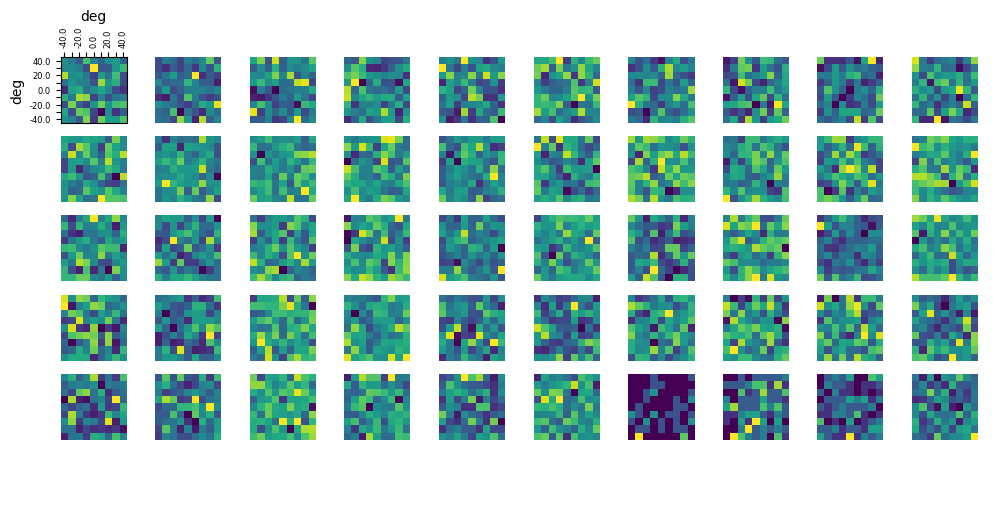

In [13]:
### display the receptive fields for each unit in a 2D plot

n_cols = 10
n_rows = len(unit_rfs)//n_cols
fig, axes = plt.subplots(n_rows+1, n_cols)
fig.set_size_inches(12, n_rows+1)

# handle case where there's <= 10 rfs
if len(axes.shape) == 1:
    axes = axes.reshape((1, axes.shape[0]))

for irf, rf in enumerate(unit_rfs):
    ax_row = int(irf/10)
    ax_col = irf%10
    axes[ax_row][ax_col].imshow(rf, origin="lower")
for ax in axes.flat[1:]:
    ax.axis('off')

# making axis labels for first receptive field
axes[0][0].set_xlabel(field_units)
axes[0][0].set_ylabel(field_units)
axes[0][0].xaxis.set_label_position("top") 
axes[0][0].xaxis.set_ticks_position("top")
axes[0][0].set_xticks(range(len(xs)), xs, rotation=90, fontsize=6)
axes[0][0].set_yticks(range(len(ys)), ys, fontsize=6)

for i, l in enumerate(axes[0][0].xaxis.get_ticklabels()):
    if i % 2 != 0:
        l.set_visible(False)
for i, l in enumerate(axes[0][0].yaxis.get_ticklabels()):
    if i % 2 != 0:
        l.set_visible(False)

### Loading Stimulus Times

In [14]:
print(nwb.intervals.keys())

dict_keys(['RepeatFFF_presentations', 'UniqueFFF_presentations', 'invalid_times', 'receptive_field_block_presentations', 'static_block_presentations'])


In [15]:
stimTypeToExtract='RepeatFFF_presentations'

In [16]:
# Information about the stimulus
stim_table = nwb.intervals[stimTypeToExtract]    
stim_table

,start_time,stop_time,stimulus_name,stimulus_block,index_repeat,contrast,mask,opacity,orientation,phase,spatial_frequency,size,units,stimulus_index,color,tags,timeseries
id,,,,,,,,,,,,,,,,,
0,161.81776,161.83444,RepeatFFF,1.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,1.0,[stimulus_time_interval],"[(7200, 1, timestamps pynwb.base.TimeSeries at 0x2217681855168\nFields:\n comments: no comments\n conversion: 1.0\n data: <HDF5 dataset ""data"": shape (405120,), type ""<f8"">\n description: no description\n interval: 1\n offset: 0.0\n resolution: -1.0\n timestamps: <HDF5 dataset ""timestamps"": shape (405120,), type ""<f8"">\n timestamps_unit: seconds\n unit: s\n)]"
1,161.83444,161.85113,RepeatFFF,1.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,1.0,[stimulus_time_interval],"[(7201, 1, timestamps pynwb.base.TimeSeries at 0x2217681855168\nFields:\n comments: no comments\n conversion: 1.0\n data: <HDF5 dataset ""data"": shape (405120,), type ""<f8"">\n description: no description\n interval: 1\n offset: 0.0\n resolution: -1.0\n timestamps: <HDF5 dataset ""timestamps"": shape (405120,), type ""<f8"">\n timestamps_unit: seconds\n unit: s\n)]"
2,161.85113,161.86781,RepeatFFF,1.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,-1.0,[stimulus_time_interval],"[(7202, 1, timestamps pynwb.base.TimeSeries at 0x2217681855168\nFields:\n comments: no comments\n conversion: 1.0\n data: <HDF5 dataset ""data"": shape (405120,), type ""<f8"">\n description: no description\n interval: 1\n offset: 0.0\n resolution: -1.0\n timestamps: <HDF5 dataset ""timestamps"": shape (405120,), type ""<f8"">\n timestamps_unit: seconds\n unit: s\n)]"
3,161.86781,161.88448,RepeatFFF,1.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,-1.0,[stimulus_time_interval],"[(7203, 1, timestamps pynwb.base.TimeSeries at 0x2217681855168\nFields:\n comments: no comments\n conversion: 1.0\n data: <HDF5 dataset ""data"": shape (405120,), type ""<f8"">\n description: no description\n interval: 1\n offset: 0.0\n resolution: -1.0\n timestamps: <HDF5 dataset ""timestamps"": shape (405120,), type ""<f8"">\n timestamps_unit: seconds\n unit: s\n)]"


In [17]:
# pull out some stimulus details we will need for our analysis
StimIndexList=np.unique(np.array((stim_table["stimulus_index"])) )  # array of stimulus conditions 
IndexRepeatList=np.unique(np.array((stim_table["index_repeat"]))) # array of repeat numbers within the block 
StimNameList=set(stim_table["stimulus_name"])
nPresentations=len(StimIndexList); # determine number of instances from the data
# determine nRepeats from the data
nRepeats=len(IndexRepeatList)
print(stimTypeToExtract,' was repeated ',nRepeats,' times')

RepeatFFF_presentations  was repeated  90  times


### Getting Trial-Aligned Event Times

In [18]:
example_indices = [652, 1109, 0]

In [19]:
# Find the start times of the repeated stimulus
#cast the index_repeat and stim_index columns from  hdmf.common.table.VectorData into arrays
index_repeat=np.array(stim_table["index_repeat"])  
stim_index=np.array(stim_table["stimulus_index"])
# note that the repeats are not necessarily back to back so the duration is determined by 
# the end time of the same repeat, not the start time of the next repeat
stim_times=np.zeros(nRepeats*nPresentations)
endtime=np.zeros(nRepeats*nPresentations)
for k in range(nPresentations): #loop over presentations of this stimulus
    mask1=stim_index==StimIndexList[k] #true for all elements in this presentation
    for j in range(nRepeats):   #loop over repeats within the presentation
        mask2=index_repeat==j #true for all elements with this repeat number
        ind1=np.where(np.logical_and(mask1,mask2))[0][0] # index of first element meeting conditoins
        stim_times[k*nRepeats+j]= stim_table["start_time"][ind1]

        ind2=np.where(np.logical_and(mask1,mask2))[0][-1]  # index of last element meeting conditoins
        endtime[k*nRepeats+j]= stim_table["stop_time"][ind2]

# the actual duration of each repeat is given by end_time-start_time
# average these to get the nominal duration for all trials, for further analysis
eachduration=endtime-stim_times # the values should be close to identical (check this)
duration=np.mean(eachduration) # then set the "duration" variable to the mean duration 
duration=np.round(duration*1000)/1000  #truncated to three significant digits

In [20]:
# helper function that extracts and aligns spike times for one unit
def makeAlignedEvents(spike_times,stim_times,duration:float):
    """
    INPUTS:
    spike_times     array of spike times of a single unit, in seconds
    stim_times      array of start times of a repeated stimulus, in seconds
    duration        duration of the repeated stimulus, in seconds
    
    OUTPUTS:
    events          1D array whose elements are all times when a spike is seen in a repeat relative to the start of repeat
  
    """
    nRepeats=len(stim_times) #number of stim_time entries would give us the number of repeats for that stimulus
    events=np.zeros((nRepeats,)).tolist()
    
    for stim_idx, stim_time in enumerate(stim_times): 
        first_spike_in_range, last_spike_in_range = np.searchsorted(spike_times, [stim_time, stim_time+duration])
        spike_times_in_range = np.array(spike_times[first_spike_in_range:last_spike_in_range])  
        spike_times_in_range=spike_times_in_range-stim_time #set trial start as time 0 
        events[stim_idx]=spike_times_in_range.tolist()

    return events

In [21]:
# Extract the aligned responses of three example neurons specified above
spike_train_lst_n1 = makeAlignedEvents(units_spike_times[example_indices[0]],stim_times,duration) 
spike_train_lst_n2 = makeAlignedEvents(units_spike_times[example_indices[1]],stim_times,duration) 
spike_train_lst_n3 = makeAlignedEvents(units_spike_times[example_indices[2]],stim_times,duration) 

# show the times of the first five spikes in the first stimulus repeat of one neuron
spike_train_lst_n1[0][:5]

[0.08407305216266536,
 0.08840637467088186,
 0.09840634968989548,
 0.09983967944262417,
 0.3860389644867439]

In [22]:
# Let's find out a bit about our example units now
for i in range(len(example_indices)):
    #use total number of spikes in the 1 hour experiment to estimate firing rate
    FR=len(units_spike_times[example_indices[i]])/(60*60)
    FR=np.round(FR,1)
    print('example', i+1, 'is unit',example_indices[i],', a',units_quality[example_indices[i]],'unit recorded from',units_location[example_indices[i]],', FR~=',FR)

example 1 is unit 652 , a good unit recorded from SCop , FR~= 28.4
example 2 is unit 1109 , a good unit recorded from LGd-co , FR~= 31.9
example 3 is unit 0 , a good unit recorded from LH , FR~= 24.7


### Plotting rasters
To visualize the responses of neurons we can plot the times of spikes relative to the stimulus onset time, from the trial spike trains that were just computed. In a spike raster plot like these, the x axis is time in seconds, the y axis is repeat number, and each dot is the time of one spike. When spikes appear at the same time in every trial, we see a vertical stripe in the raster. Units that have such vertical stripes look like "barcodes", hence the name of this project.

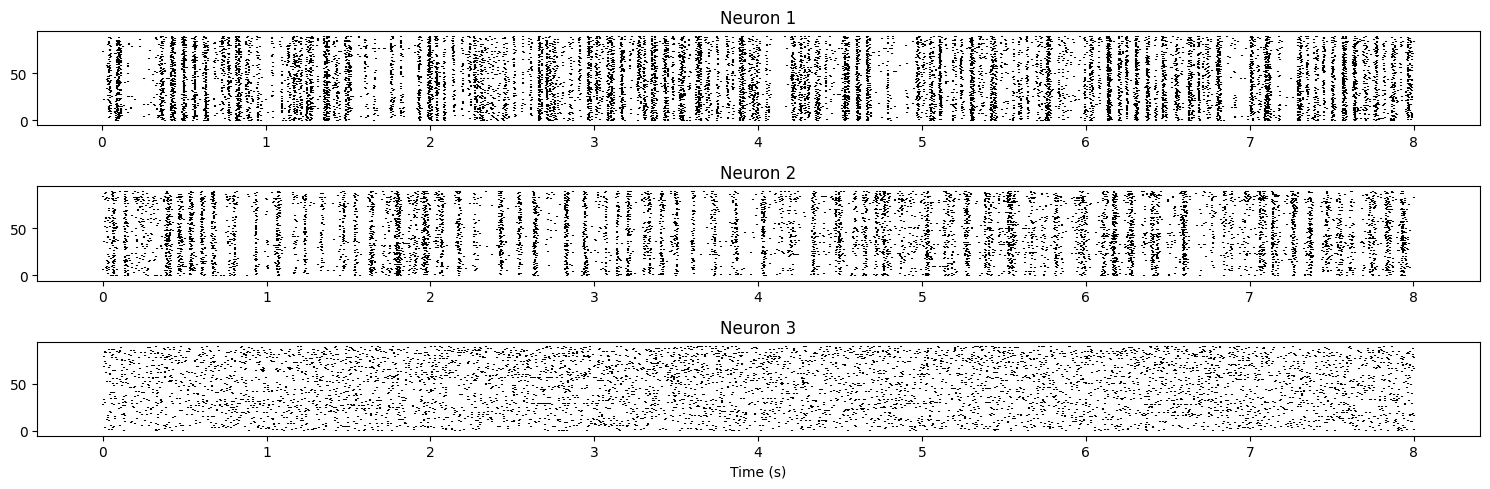

In [23]:
#Make a figure to show rasters for three example cells
fig, axes = plt.subplots(3, 1, figsize=(15, 5))  # 1 row, 3 columns

# Plot directly on each axis
axes[0].eventplot(spike_train_lst_n1, colors='black')
axes[0].set_title("Neuron 1")

axes[1].eventplot(spike_train_lst_n2, colors='black')
axes[1].set_title("Neuron 2")

axes[2].eventplot(spike_train_lst_n3, colors='black')
axes[2].set_title("Neuron 3")
axes[2].set_xlabel("Time (s)")

# Adjust layout
plt.tight_layout()
plt.show()


- Two of the example neurons clearly have barcodes!
- This may be the first time precise spike timing codes have been demonstrated in SC (Neuron 1)
- Precise spike timing codes have been described previously in the LGN (Neuron 2)
- Neuron 3 is non-visual neuron, included to show what it looks like to NOT have a barcode


### Getting PSTHs for the spike trains
Now that barcodes can be seen in the plots above, we'd like a way to more clearly express the barcode. The Barcode of the cell is defined as the times of these precisely aligned firing events
One way to extract those times is to find the peaks in the peri-stimulus time histogram (PSTH).

In [24]:
min_spikes = [19, 19, 19]  # number of spikes in a time bin to qualify as a "bar"
                           # in principle should depend on firing rate, # repeats, and duration of stimulus  
trial_duration = 8 # Duration of the repeated stimulus in seconds 
bin_duration = 0.008 # Time bin to use in seconds 

In [25]:
# Helper function to compute PSTH by assigning spike times to time bins
def compute_psth(spike_trains, total_duration, bin_duration):
    n_bins = int(total_duration / bin_duration)
    psth = np.zeros(n_bins, dtype=float)
    for train in spike_trains:
        binned_spikes = np.floor(np.array(train) / bin_duration).astype(int)
        valid_bins = binned_spikes[binned_spikes < n_bins]
        psth[valid_bins] += 1
    psth /= len(spike_trains)
    return psth 

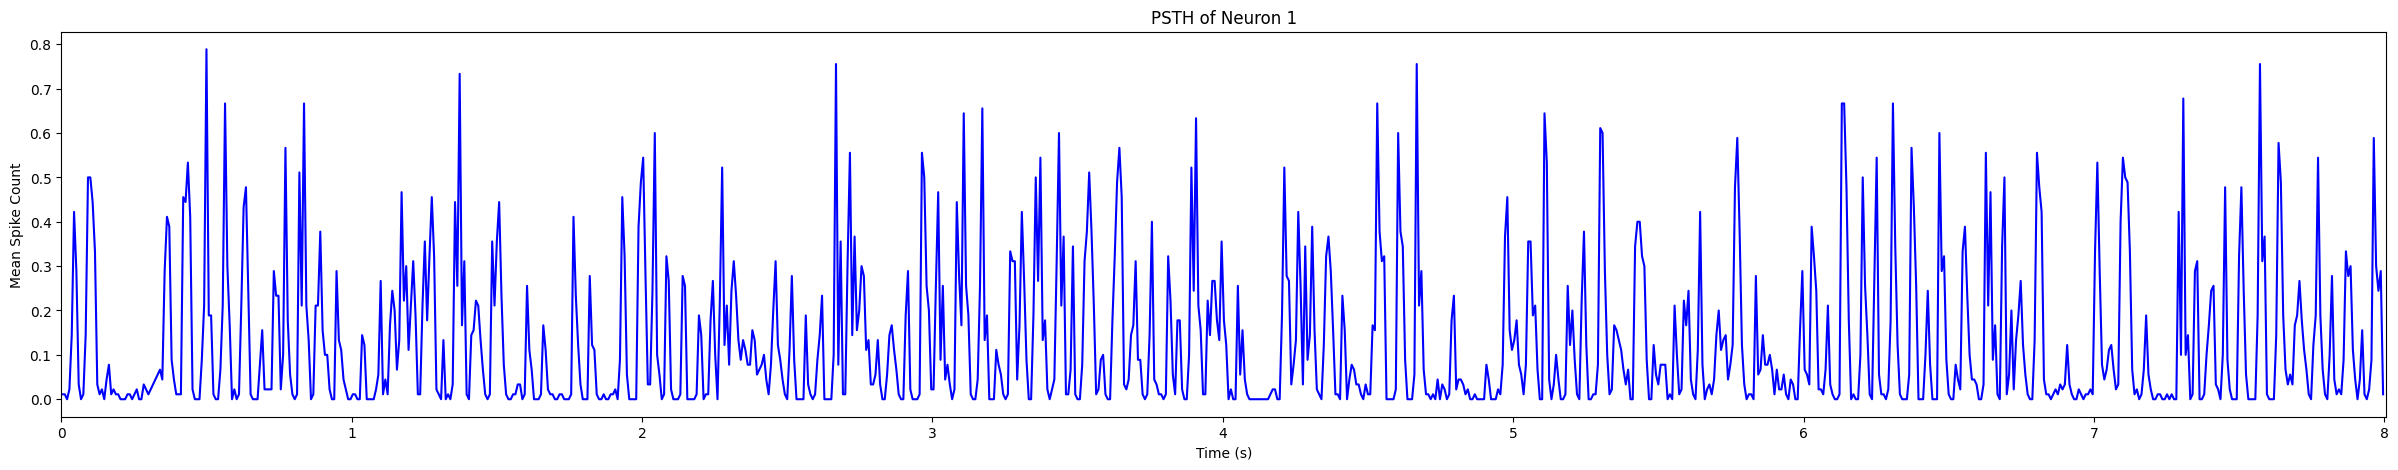

In [26]:
# Plot the psth of one of the example neurons 
psth1=compute_psth(spike_train_lst_n1, trial_duration, bin_duration)
n_bins = len(psth1) 
bin_midpoints = (np.arange(n_bins) + 0.5) * bin_duration
fig, ax = plt.subplots(figsize=(30, 5))
plt.plot(bin_midpoints, psth1, color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Mean Spike Count')
plt.title('PSTH of Neuron 1')
plt.xlim([0,duration])
plt.show()

In [27]:
# Helper function versions of the above algorithm
# turn the code above into a helper function to return bar codes for any spiketrain
def find_bars(spike_train, trial_duration, bin_duration,min_spikes):
    nRepeats=len(spike_train)
    psth=compute_psth(spike_train, trial_duration, bin_duration)
    significant_array = psth*nRepeats >  min_spikes
    significant_indices = np.where(significant_array)[0] #indexes to qualifying time bins
    n_bins = len(psth) 
    bin_midpoints = (np.arange(n_bins) + 0.5) * bin_duration

    # Consecutive qualifying time bins are considered part of the same "Bar"
    # The time of that bar is considered to be the mean of those bin centers
    bars = []
    current_group = []
    for idx in significant_indices:
        if not current_group or idx == current_group[-1] + 1:
            current_group.append(idx)
        else:
            bars.append(np.mean(bin_midpoints[current_group]))
            current_group = [idx]
    if current_group:
        bars.append(np.mean(bin_midpoints[current_group]))

    return bars,psth,significant_indices,bin_midpoints

In [28]:
# turn the code above into a function to plot bar codes on a psth
# replot the PSTH, expanding the axis, color coding the significant points, and labeling the bar times
def plotPSTHbarcode(psth, bin_midpoints, threshold, significant_indices, bars, xlim=None):
    fig, ax = plt.subplots(figsize=(30, 5))
    plt.plot(bin_midpoints, psth, label='PSTH',color='blue')
    plt.xlabel('Time (s)')
    plt.ylabel('Mean Spike Count')
    plt.title('PSTH')
    if xlim is not None:
        plt.xlim(xlim)

    # Plot threshold in red, points exceeding threshold in green
    plt.plot(bin_midpoints, threshold*np.ones_like(bin_midpoints), label='Threshold', color='red')
    plt.scatter(bin_midpoints[significant_indices], psth[significant_indices], color='green', label='Above Thresh', zorder=5)
    
    #show inferred bar times
    bar_offset = max(psth) * 1.2
    bar_height = max(psth) * 0.05
    for i, bar_x in enumerate(bars):
        if i == 0:
            plt.plot([bar_x, bar_x], [bar_offset, bar_offset + bar_height], color='black', lw=1, label='Bars')
        else:
           plt.plot([bar_x, bar_x], [bar_offset, bar_offset + bar_height], color='black', lw=1)
    plt.legend()
    plt.show()

In [29]:
#Compute the barcodes of all three eample units
barcode_n1,psth1,ind1,midpts1 = find_bars(spike_train_lst_n1, trial_duration, bin_duration, min_spikes[0])
barcode_n2, psth2,ind2,midpts2 = find_bars(spike_train_lst_n2, trial_duration, bin_duration, min_spikes[1])
barcode_n3,psth3,ind3,midpts3 = find_bars(spike_train_lst_n3, trial_duration, bin_duration, min_spikes[2])
len(barcode_n1), len(barcode_n2), len(barcode_n3)

(119, 68, 0)

- notice neuron 3 has no bars in its barcode

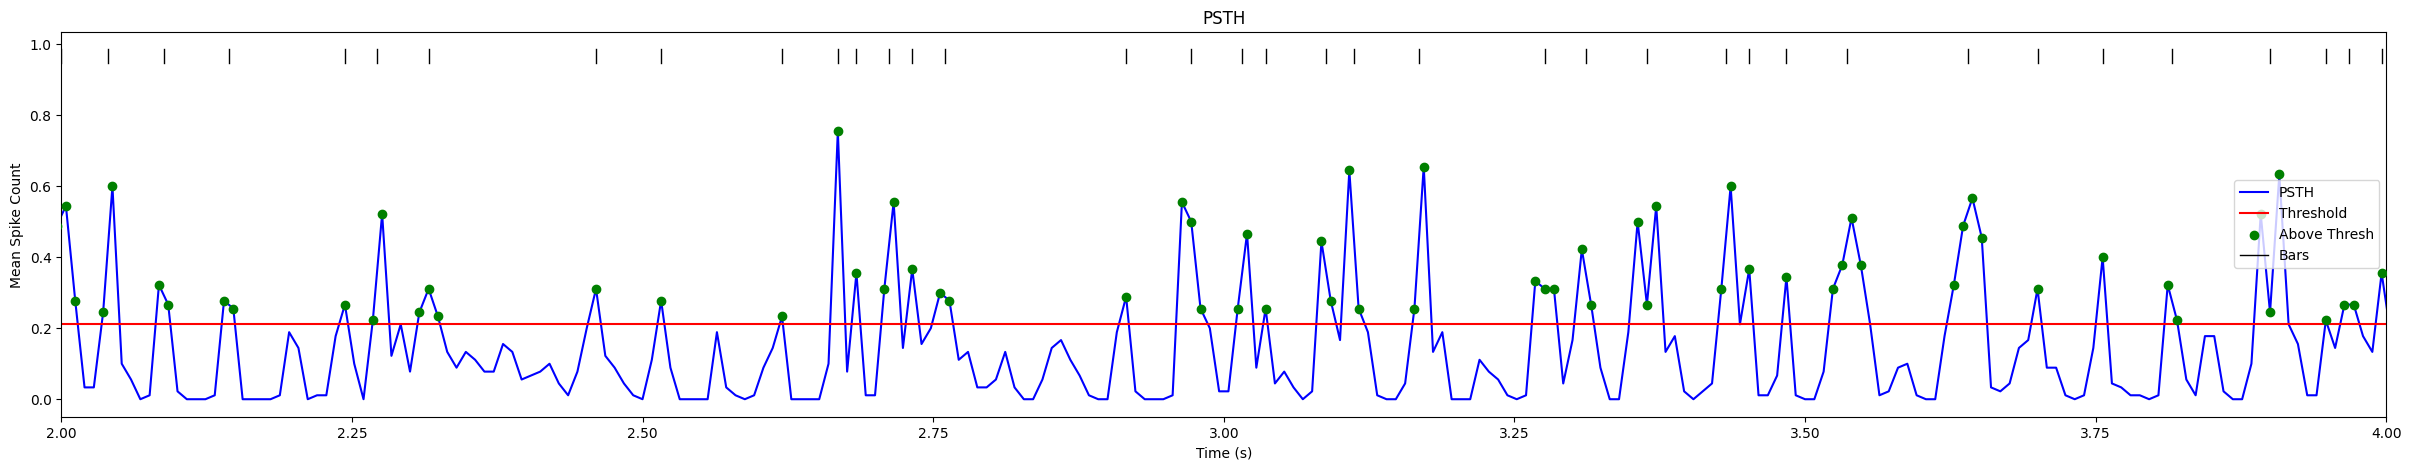

In [30]:
expandedView=[2,4]  # xlim for detail view of psth, arbitrary for illustration
plotPSTHbarcode(psth1, midpts1, min_spikes[0]/nRepeats, ind1, barcode_n1, xlim=expandedView)

In [31]:
# First few bar times of neuron 1
np.round(barcode_n1[:3],3)

array([0.048, 0.104, 0.364])

In [32]:
# First few bar times of neuron 2
np.round(barcode_n2[:3],3)

array([0.064, 0.14 , 0.4  ])

## 5. Spike Distance Metric

One way to quantify the similarity between two bar code is an **edit distance metric** 
(the same principle used to align and compare genetic sequences)
 
The **Victor-Purpura distance** measures the minimum number of operations to transform one spike train into another.
There are three legal operations:

1. **Deleting a Spike**  
   - Remove a spike from one train if it doesn’t match any spike in the other train.

2. **Adding a Spike** 
   - Insert a spike into a train to align it with the other train.

3. **Shifting a Spike** (Cost depends on how far you shift):
   - Adjust the timing of a spike to align it with a spike in the other train.
   - The cost of shifting depends on how far the spike moves, scaled by the `cost` parameter.

Citation: Victor JD, Purpura KP. Nature and precision of temporal coding in visual cortex: a metric-space analysis. J Neurophysiol. 1996;76(2):1310-26. Epub 1996/08/01. doi: 10.1152/jn.1996.76.2.1310.  

In [33]:
# Here is a helper function implementing a simple algorithm to compute the minimum edit distance  
def spkd(tli, tlj, cost):
    '''
    Determines the minimum number of operations required to convert one bar code into the other 
    where the legal steps are to add a bar, delete a bar, or move a bar over by cost seconds
    INPUTS:
    tli        array of event times in one example, in seconds
    tlj        array of event times in another example, in seconds
    cost       number of seconds you can shift an event for the same cost as deleting or adding a spike
    
    OUTPUTS:
    d          the distance between i and j 
  
    Translated to Python by Siddharth Vyasabattu 2025 from Matlab code by Daniel Reich
    Translated to Matlab by Daniel Reich 1999 from FORTRAN code by Jonathan Victor
    (used with permission from JV)
    
    '''
    nspi = len(tli)
    nspj = len(tlj)

    if cost == 0:
        return abs(nspi - nspj)
    elif cost == float('inf'):
        return nspi + nspj

    # Initialize the cost matrix
    scr = np.zeros((nspi + 1, nspj + 1))

    # Margins with the cost of adding a spike
    scr[:, 0] = np.arange(nspi + 1)
    scr[0, :] = np.arange(nspj + 1)

    # Calculate the costs for aligning spike trains
    if nspi > 0 and nspj > 0:
        for i in range(1, nspi + 1):
            for j in range(1, nspj + 1):
                scr[i, j] = min(
                    scr[i - 1, j] + 1,
                    scr[i, j - 1] + 1,
                    scr[i - 1, j - 1] + cost * abs(tli[i - 1] - tlj[j - 1])
                )
    d = scr[nspi, nspj]  #the distance metric
    return d


### Computing Distances Between Barcodes

In [34]:
# Let's just compare two fictional barcocdes
example_barcode_1 = [2, 3, 7]
example_barcode_2 =[2.1, 5, 7.2]
example_barcode_1, example_barcode_2

([2, 3, 7], [2.1, 5, 7.2])

In [35]:
cost = 1 # cost per 1s shift in a spike time
spkd(example_barcode_1, example_barcode_2, cost)

2.3000000000000003

Optional Exercises
- Modify the cost parameter to see how the distance changes. 
- Try computing the distance by hand using the algorithm above
- Is the distance from neuron1 to neuron2 the same as the distance from neuron2 to neuron1?

In [36]:
##### Now compute the distances between two neurons' barcodes:
print('Neuron 1 has ', len(barcode_n1), ' bars in its barcode')
print('Neuron 2 has ', len(barcode_n2), ' bars in its barcode')
print('Worst case, deleting all of Neuron1 bars and inserting all of Neuron2 bars')
print('would cost ',len(barcode_n1),' + ',len(barcode_n2),' = ',len(barcode_n1)+len(barcode_n2))
cost=.2 
# The distance between the full length barcodes
d=spkd(barcode_n1, barcode_n2, cost)
print('For a shift cost of ',cost,' the distance is = ',d)

Neuron 1 has  119  bars in its barcode
Neuron 2 has  68  bars in its barcode
Worst case, deleting all of Neuron1 bars and inserting all of Neuron2 bars
would cost  119  +  68  =  187
For a shift cost of  0.2  the distance is =  51.4144


## What does the distance between two barcodes mean?

- Any bar code can be converted to any other bar code for **some** cost. If they are identical the cost will be 0.

- What cost should we epect on chance if the bar codes are not really related?

- We can make a control bar code by **circularly permuting** the real bar code. This preserves the number of bars and the intervals between them, but destroys their alignment with the visual stimulus.

In [37]:
# To circularly permute one of the two barcodes, we apply a random time shift to all the events. 
# If an event’s new time exceeds the total duration of the trial, it wraps around to the beginning 
# using modular arithmetic. To illustrate suppose a barcode had bars at 2, 4 and 7s
examplebarcode=[2,4,7]
print('example bar code = ',examplebarcode)

# and suppose the random offset was 1.5s
offset = 1.5
print('offset = ', offset)

# this adds the offset to each bar's time
for i in range(len(examplebarcode)):
    examplebarcode[i] += offset
print('shifted bar code = ',examplebarcode)
print('stimulus duration = ',duration)

# this wraps the values exceeding the trial duration back to 
# the beginning and sorts them in order again
permutedexample = np.sort( examplebarcode % duration )
print('permuted bar code = ',permutedexample)

example bar code =  [2, 4, 7]
offset =  1.5
shifted bar code =  [3.5, 5.5, 8.5]
stimulus duration =  8.007
permuted bar code =  [0.493 3.5   5.5  ]


In [38]:
# helper function to permute barcodes
def permute_barcode(barcode,duration):
    random_offset = np.random.uniform(0, duration)
    for i in range(len(barcode)):
        barcode[i] += random_offset
    permutedcode = np.sort(barcode % duration)
    return permutedcode

- Now let's permute the full length barcode of neuron 1 and compute its distance to the barcode of neuron 2

In [39]:
permuted_barcode1 = permute_barcode(barcode_n1, duration)
control_d=spkd(permuted_barcode1, barcode_n2, cost)
print('For a shift cost of ',cost)
print('Distance from neuron1 to neuron2 was ',np.round(d,1))
print('Distance from permuted neuron1 to neuron2 was ',np.round(control_d,1))

For a shift cost of  0.2
Distance from neuron1 to neuron2 was  51.4
Distance from permuted neuron1 to neuron2 was  51.4


- We can repeat this 1000 times to get a null distribution 

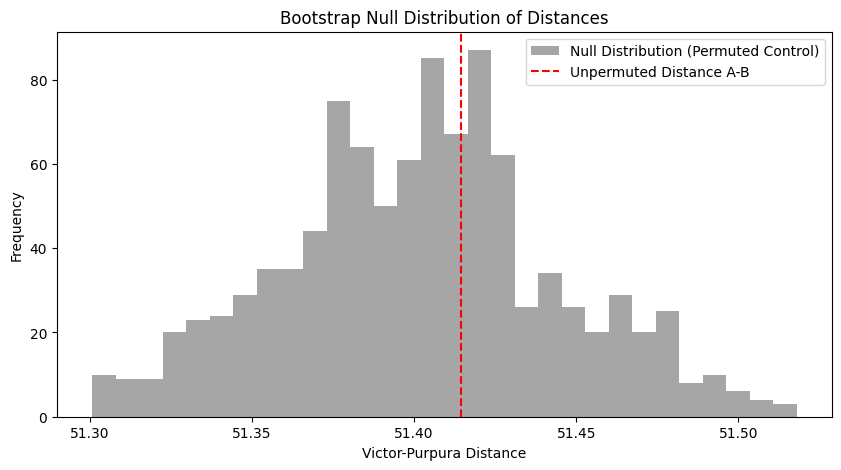

In [40]:
perm_barcode_dist = []
for i in range(1000):
    permuted_barcode1 = permute_barcode(barcode_n1, duration)
    perm_barcode_dist.append(spkd(permuted_barcode1, barcode_n2, cost))
plt.figure(figsize=(10, 5))
plt.hist(perm_barcode_dist, bins=30, color='gray', alpha=0.7, label="Null Distribution (Permuted Control)")
plt.axvline(x=d, color='red', linestyle='--', label="Unpermuted Distance A-B")
plt.xlabel("Victor-Purpura Distance")
plt.ylabel("Frequency")
plt.title("Bootstrap Null Distribution of Distances")
plt.legend()
plt.show()

- In this example, the two barcodes are no more related than expected on chance, suggesting these are distinct cell types
- If the distance between two barcodes is very **small** compared to the null distribution, the barcodes are significantly similar
- If the distance is very **large** compared to the null distribution,  the barcodes are significantly opposed
- By comparing the distances between the barcodes of all units, we can cluster or **classify** neurons according to their barcodes

## Exercises for the reader
- You could try different cost parameters. The higher the cost, the more the distance reflects precise temporal alignment of the barcodes. The lower the cost, the more it reflects the difference in firing rates 
- You could try different example units, perhaps from different visual areas.
- Above we hand-coded the bin size to use for the PSTHs, but you could try a different choice. The best choice can be derived in a principled way for each unit, for example based on the autocorrelation of the PSTH. 
- Above we hand-coded the threshold spike count in a bin to qualify as a barcode bar, but this can be derived in a statistical way for each unit based on the firing rate of the neuron, the bin size, the total duration of the stimulus, and the number of repeats.
- Above we used a quick and dirty method to find peaks in the PSTH to define the bar codes, this could be refined
- You could condition on other columns the units table to select units based on different inclusion criteria
- You could try different distance metrics -- there are many


## Other things you can find in this dataset
- We used two different electrode configurations; in half the mice we prioritized targeting of subcortical visual areas; the other half prioritized targeting cortical visual areas. This dataset has more dLGN and SC neurons than any previous Allen Institute dataset
- The stimulus table variable 'color' contains the luminance of the visual stimulus in each video frame 
- We also presented a longer 120s unique full field white noise sequence
- We also presented standing sine gratings modulated by white noise in time, in order to drive units that might not respond to spatially uniform stimuli. Spatial frequency, phase and orientation were varied.
- There are flashed gabor stimuli which can be used to map the receptive field locations
- Running speed and pupil dilation data could be used to test for modulatory effects on barcodes
- Optotagging data can be used to identify units in one molecularly defined cell type per mouse


### Session Timeline
To get a good idea of the temporal structure of the stimulus throughout the session, the code below generates a timeline of the various 'epochs' of stimulus. It can be seen that there is a period of random full field flashes, followed by repeated full field flashes and more random flashes. Then static block presentations and receptive field presentations. Finally, there is an optogenetic stimulation period.

In [41]:
# extract epoch times from stim table where stimulus rows have a different 'block' than following row
# returns list of epochs, where an epoch is of the form (stimulus name, stimulus block, start time, stop time)
def extract_epochs(stim_name, stim_table, epochs):
    
    # specify a current epoch stop and start time
    epoch_start = stim_table.start_time[0]
    epoch_stop = stim_table.stop_time[0]

    # for each row, try to extend current epoch stop_time
    for i in range(len(stim_table)):
        this_block = stim_table.stimulus_block[i]
        # if end of table, end the current epoch
        if i+1 >= len(stim_table):
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            break
            
        next_block = stim_table.stimulus_block[i+1]
        # if next row is the same stim block, push back epoch_stop time
        if next_block == this_block:
            epoch_stop = stim_table.stop_time[i+1]
        # otherwise, end the current epoch, start new epoch
        else:
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            epoch_start = stim_table.start_time[i+1]
            epoch_stop = stim_table.stop_time[i+1]
    
    return epochs

In [42]:
# extract epochs from all valid stimulus tables
epochs = []
for stim_name in nwb.intervals.keys():
    stim_table = nwb.intervals[stim_name]
    try:
        epochs = extract_epochs(stim_name, stim_table, epochs)
    except:
        continue

# manually add optotagging epoch since the table is stored separately
opto_stim_table = nwb.processing["optotagging"]["optogenetic_stimulation"]
opto_epoch = ("optogenetic_stimulation", 1.0, opto_stim_table.start_time[0], opto_stim_table.stop_time[-1])
epochs.append(opto_epoch)

# epochs take the form (stimulus name, stimulus block, start time, stop time)
print(len(epochs))
epochs.sort(key=lambda x: x[2])
for epoch in epochs:
    print(epoch)

6
('UniqueFFF_presentations', 0.0, 41.70058, 161.81776)
('RepeatFFF_presentations', 1.0, 161.81776, 882.43771)
('UniqueFFF_presentations', 2.0, 882.43771, 1002.53826)
('static_block_presentations', 3.0, 1002.53826, 6767.68327)
('receptive_field_block_presentations', 4.0, 6767.68327, 7248.085746666667)
('optogenetic_stimulation', 1.0, 7267.91448, 8138.04606)


In [43]:
time_start = floor(min([epoch[2] for epoch in epochs]))
time_end = ceil(max([epoch[3] for epoch in epochs]))
all_units_spike_times = np.concatenate(units_spike_times).ravel()
print(time_start, time_end)

# make histogram of unit spikes per second over specified timeframe
time_bin_edges = np.linspace(time_start, time_end, (time_end-time_start))
hist, bins = np.histogram(all_units_spike_times, bins=time_bin_edges)

41 8139


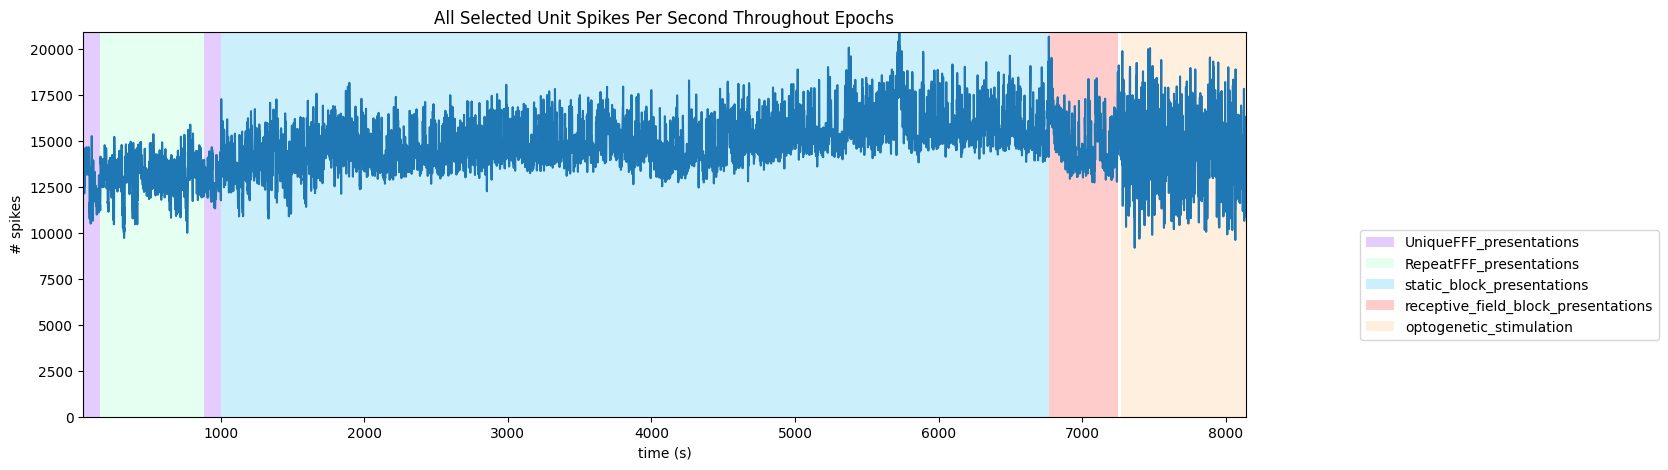

In [44]:
# generate plot of spike histogram with colored epoch intervals and legend
fig, ax = plt.subplots(figsize=(15,5))

# assign unique color to each stimulus name
stim_names = list({epoch[0] for epoch in epochs})
colors = plt.cm.rainbow(np.linspace(0,1,len(stim_names)))
stim_color_map = {stim_names[i]:colors[i] for i in range(len(stim_names))}

epoch_key = {}
height = max(hist)
# draw colored rectangles for each epoch
for epoch in epochs:
    stim_name, stim_block, epoch_start, epoch_end = epoch
    color = stim_color_map[stim_name]
    rec = ax.add_patch(mpl.patches.Rectangle((epoch_start, 0), epoch_end-epoch_start, height, alpha=0.2, facecolor=color))
    epoch_key[stim_name] = rec

ax.set_xlim(time_start, time_end)
ax.set_ylim(-0.1, height+0.1)
ax.set_xlabel("time (s)")
ax.set_ylabel("# spikes")
ax.set_title("All Selected Unit Spikes Per Second Throughout Epochs")

fig.legend(epoch_key.values(), epoch_key.keys(), loc="lower right", bbox_to_anchor=(1.18, 0.25))
ax.plot(bins[:-1], hist)